In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from acquire import get_titanic_data

from prepare_cu import prep_titanic
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [3]:
# acquire the data
df = get_titanic_data()

# prepare the data
train, validate, test = prep_titanic(df)

In [4]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [5]:
# drop out non-numerical columns or non-encoded version remaining in this data set
drops = ['sex', 'class','embarked', 'embark_town', 'passenger_id']

In [6]:
[dataset.drop(columns=drops, inplace=True) for dataset in [train, validate, test]]

[None, None, None]

In [7]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,Q,S
583,0,1,36.000000,0,0,40.1250,1,0,0
337,1,1,41.000000,0,0,134.5000,1,0,0
50,0,3,7.000000,4,1,39.6875,0,0,1
218,1,1,32.000000,0,0,76.2917,1,0,0
31,1,1,29.916875,1,0,146.5208,0,0,0


In [8]:
# Decision Tree Classifier Model will predict survival

# Decision Tree Exercises
 - https://ds.codeup.com/classification/decision-trees/#installing-graphviz

# 1. What is your baseline prediction? What is your baseline accuracy?
- Baseline prediction is 62% accuracy when always predicting death

In [9]:
# obtain our mode
train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [10]:
#baseline is death = 0 as there are 307 deaths (mode) and only 190 suvivors
train['baseline_death'] = 0

In [11]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,Q,S,baseline_death
583,0,1,36.000000,0,0,40.1250,1,0,0,0
337,1,1,41.000000,0,0,134.5000,1,0,0,0
50,0,3,7.000000,4,1,39.6875,0,0,1,0
218,1,1,32.000000,0,0,76.2917,1,0,0,0
31,1,1,29.916875,1,0,146.5208,0,0,0,0


In [12]:
print(f'Our baseline accuracy for nonsurvival in all cases on the Titanic Dataset is {(train.baseline_death == train.survived).mean():.3}')

Our baseline accuracy for nonsurvival in all cases on the Titanic Dataset is 0.618


In [13]:
baseline_class_report = classification_report(train.survived, train.baseline_death, zero_division=True)
print(baseline_class_report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       1.00      0.00      0.00       190

    accuracy                           0.62       497
   macro avg       0.81      0.50      0.38       497
weighted avg       0.76      0.62      0.47       497



# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [14]:
#create the model
dtc = DecisionTreeClassifier()

In [15]:
# remove baseline assumption from the train
train.drop(columns='baseline_death', inplace=True)

In [16]:
#split our X and y
X_train = train.drop(columns='survived')
y_train = train[['survived']]

In [17]:
# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# designate our X and y
X = X_train
y = y_train

In [19]:
accuracy = dtc.score(X, y)
y_pred = dtc.predict(X)
conf = confusion_matrix(y, y_pred)
#class report
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
#true positive rate
tpr = conf[1][1] / conf[1].sum()
#false positvive rate
fpr = conf[0][1] / conf[0].sum()
#true negative rate
tnr = conf[0][0] / conf[0].sum()
#false negative rate
fnr = conf[1][0] / conf[1].sum()

print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report



The accuracy for our model is 0.9738
The True Positive Rate is 0.968, The False Positive Rate is 0.0228,
The True Negative Rate is 0.977, and the False Negative Rate is 0.0316



,precision,recall,f1-score,support
0,0.980392,0.977199,0.978793,307.000000
1,0.963351,0.968421,0.965879,190.000000
accuracy,0.973843,0.973843,0.973843,0.973843
macro avg,0.971871,0.972810,0.972336,497.000000
weighted avg,0.973877,0.973843,0.973856,497.000000


# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [20]:
# use the model to predict
#dtc
y_pred = dtc.predict(X_train)


In [21]:
# check the values in the predictions
pd.Series(y_pred).value_counts()

0    306
1    191
dtype: int64

In [22]:
# model score: accuracy
accuracy = dtc.score(X_train, y_train)

In [23]:
accuracy

0.9738430583501007

In [24]:
# confusion matrix
conf = confusion_matrix(y_train, y_pred)

In [25]:
conf

array([[300,   7],
       [  6, 184]])

In [26]:
# get the classification report
class_report = classification_report(y_train, y_pred, output_dict=True)

In [27]:
class_report

{'0': {'precision': 0.9803921568627451,
  'recall': 0.9771986970684039,
  'f1-score': 0.9787928221859705,
  'support': 307},
 '1': {'precision': 0.9633507853403142,
  'recall': 0.968421052631579,
  'f1-score': 0.9658792650918635,
  'support': 190},
 'accuracy': 0.9738430583501007,
 'macro avg': {'precision': 0.9718714711015296,
  'recall': 0.9728098748499914,
  'f1-score': 0.972336043638917,
  'support': 497},
 'weighted avg': {'precision': 0.9738773468239887,
  'recall': 0.9738430583501007,
  'f1-score': 0.9738560498562314,
  'support': 497}}

In [28]:
pd.DataFrame(class_report).rename(columns={'0': 'deceased', '1': 'survived'}).T

,precision,recall,f1-score,support
deceased,0.980392,0.977199,0.978793,307.000000
survived,0.963351,0.968421,0.965879,190.000000
accuracy,0.973843,0.973843,0.973843,0.973843
macro avg,0.971871,0.972810,0.972336,497.000000
weighted avg,0.973877,0.973843,0.973856,497.000000


# 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [29]:
conf

array([[300,   7],
       [  6, 184]])

In [30]:
# turn our confusio matrix into a dataframe for uman legibility:
conf_df = pd.DataFrame(conf, columns=['predict death', 'predict_survive'], index=['actual_death', 'actual_survive'])

In [31]:
conf_df

,predict death,predict_survive
actual_death,300,7
actual_survive,6,184


In [32]:
# make a key for reference
rubric_df = pd.DataFrame([['true negative', 'false positive'],['false negative', 'true positive']], columns=['predict_death', 'predict_survive'], index=['actual_death', 'actual_survive'])

In [33]:
rubric_df

,predict_death,predict_survive
actual_death,true negative,false positive
actual_survive,false negative,true positive


In [34]:
joined = pd.concat([conf_df, rubric_df], axis=1)

In [35]:
rubric_df + ':'+ conf_df.values.astype(str)

,predict_death,predict_survive
actual_death,true negative:300,false positive:7
actual_survive,false negative:6,true positive:184


# 5. Run through steps 2-4 using a different max_depth value.


In [36]:
#dtc2
dtc2 = DecisionTreeClassifier(max_depth=3)

In [37]:
# fit the model

In [38]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_pred = dtc2.predict(X_train)

# 6. Which model performs better on your in-sample data?

In [40]:
# Model #1:
accuracy = dtc.score(X, y)
y_pred = dtc.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.9738
The True Positive Rate is 0.968, The False Positive Rate is 0.0228,
The True Negative Rate is 0.977, and the False Negative Rate is 0.0316



,precision,recall,f1-score,support
0,0.980392,0.977199,0.978793,307.000000
1,0.963351,0.968421,0.965879,190.000000
accuracy,0.973843,0.973843,0.973843,0.973843
macro avg,0.971871,0.972810,0.972336,497.000000
weighted avg,0.973877,0.973843,0.973856,497.000000


In [41]:

# Model #2:
accuracy = dtc2.score(X, y)
y_pred = dtc2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7123
The True Positive Rate is 0.342, The False Positive Rate is 0.0586,
The True Negative Rate is 0.941, and the False Negative Rate is 0.658



,precision,recall,f1-score,support
0,0.698068,0.941368,0.801664,307.000000
1,0.783133,0.342105,0.476190,190.000000
accuracy,0.712274,0.712274,0.712274,0.712274
macro avg,0.740600,0.641737,0.638927,497.000000
weighted avg,0.730587,0.712274,0.677238,497.000000


# 7. Which model performs best on your out-of-sample data, the validate set?

In [42]:
# get predictions for our validation sets
y_val_pred_1 = dtc.predict(validate.drop(columns='survived'))
y_val_pred_2 = dtc2.predict(validate.drop(columns='survived'))

In [43]:
# get validation accuracy
accuracy_v_1 = dtc.score(validate.drop(columns='survived'), validate.survived)
accuracy_v_2 = dtc2.score(validate.drop(columns='survived'), validate.survived)

In [44]:
# model 1
accuracy_v_1

0.6588785046728972

In [45]:
# model 2
accuracy_v_2

0.7102803738317757

In [46]:

dot_data = export_graphviz(dtc2, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data)

In [47]:
graph.render('titanic_model_2_tree', view=True)

'titanic_model_2_tree.pdf'

In [48]:

dot_data = export_graphviz(dtc, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data)

In [49]:
graph.render('titanic_model_1_tree', view=True)

'titanic_model_1_tree.pdf'

# Random Forrest Exercises
    - https://ds.codeup.com/classification/random-forests/

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from acquire_cu import get_titanic_data
from prepare_cu import prep_titanic
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [52]:
#acquire the data
df = get_titanic_data()
#prepare the data
train, validate, test = prep_titanic(df)

In [53]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [54]:
# Drop any non-numerical columns in the data set
drops = ['sex', 'class', 'embarked', 'embark_town', 'passenger_id']

In [55]:
for dataset in [train, validate, test]: 
    dataset.drop(columns=drops, inplace=True)

In [56]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,Q,S
583,0,1,36.000000,0,0,40.1250,1,0,0
337,1,1,41.000000,0,0,134.5000,1,0,0
50,0,3,7.000000,4,1,39.6875,0,0,1
218,1,1,32.000000,0,0,76.2917,1,0,0
31,1,1,29.916875,1,0,146.5208,0,0,0


In [57]:
#create baseline is at 62 %
baseline = (y_train.value_counts().idxmax() == y_train).mean()
baseline

survived    0.617706
dtype: float64

In [58]:
# Create Random Forrest Model

clf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state = 1349)

In [59]:
#fit the model after splitting our X and y
X_train, y_train = train.drop(columns='survived'), train.survived

In [60]:
# fit the thing
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1349)

In [61]:
# use the thing
y_pred = clf.predict(X_train)

# 2. Evaluate your results using the model score, confusion matrix, and classification report.

# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [62]:
clf_score = clf.score(X_train, y_train)
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
    The accuracy for our model is {clf_score:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))


    The accuracy for our model is 0.9276
    The True Positive Rate is 0.868, The False Positive Rate is 0.0358,
    The True Negative Rate is 0.964, and the False Negative Rate is 0.132
    


,0,1,accuracy,macro avg,weighted avg
precision,0.922118,0.937500,0.927565,0.929809,0.927999
recall,0.964169,0.868421,0.927565,0.916295,0.927565
f1-score,0.942675,0.901639,0.927565,0.922157,0.926987
support,307.000000,190.000000,0.927565,497.000000,497.000000


# 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [63]:
# Create Random Forest Model

clf1 = RandomForestClassifier(min_samples_leaf=3, max_depth=3, random_state=1349)

In [64]:
# Fit the model
clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=1349)

In [65]:
y_pred1 = clf1.predict(X_train)
clf_score = clf1.score(X_train, y_train)
conf = confusion_matrix(y_train, y_pred1)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
    The accuracy for our model is {clf_score:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))


    The accuracy for our model is 0.7525
    The True Positive Rate is 0.537, The False Positive Rate is 0.114,
    The True Negative Rate is 0.886, and the False Negative Rate is 0.463
    


,0,1,accuracy,macro avg,weighted avg
precision,0.922118,0.937500,0.927565,0.929809,0.927999
recall,0.964169,0.868421,0.927565,0.916295,0.927565
f1-score,0.942675,0.901639,0.927565,0.922157,0.926987
support,307.000000,190.000000,0.927565,497.000000,497.000000


In [66]:
X_val, y_val = validate.drop(columns='survived'), validate.survived

In [67]:
print('Model #1: min samples 1, max depth 10: ON VALIDATE SET')
clf_score = clf.score(X_val, y_val)
y_pred_val = clf.predict(X_val)
conf = confusion_matrix(y_val, y_pred_val)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
    The accuracy for our model is {clf_score:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
print('-------------------------------------------\n Model #2: min samples 3, max_depth 3 : ON VALIDATE SET\n')
clf_score = clf1.score(X_val, y_val)
y_pred_val1 = clf1.predict(X_val)
conf = confusion_matrix(y_val, y_pred_val1)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
    The accuracy for our model is {clf_score:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')

Model #1: min samples 1, max depth 10: ON VALIDATE SET

    The accuracy for our model is 0.7617
    The True Positive Rate is 0.646, The False Positive Rate is 0.167,
    The True Negative Rate is 0.833, and the False Negative Rate is 0.354
    
-------------------------------------------
 Model #2: min samples 3, max_depth 3 : ON VALIDATE SET


    The accuracy for our model is 0.743
    The True Positive Rate is 0.5, The False Positive Rate is 0.106,
    The True Negative Rate is 0.894, and the False Negative Rate is 0.5
    


# 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [68]:
conf = confusion_matrix(y_train, y_pred)

In [69]:
conf

array([[296,  11],
       [ 25, 165]])

In [70]:
# key for reference
rubric_df = pd.DataFrame([['true negative', 'false positive'],['false negative', 'true positive']], columns=['predict_death', 'predict_survive'], index=['actual_death', 'actual_survive'])

In [71]:
rubric_df

,predict_death,predict_survive
actual_death,true negative,false positive
actual_survive,false negative,true positive


# 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [72]:
clf.predict_proba(X_train)

array([[0.70104785, 0.29895215],
       [0.06711869, 0.93288131],
       [0.9758    , 0.0242    ],
       [0.10064358, 0.89935642],
       [0.0443181 , 0.9556819 ],
       [0.68404055, 0.31595945],
       [0.47006918, 0.52993082],
       [0.67405366, 0.32594634],
       [0.45560234, 0.54439766],
       [1.        , 0.        ],
       [0.82134381, 0.17865619],
       [0.89806093, 0.10193907],
       [0.13108025, 0.86891975],
       [0.59453012, 0.40546988],
       [0.60759589, 0.39240411],
       [0.38816308, 0.61183692],
       [0.93794664, 0.06205336],
       [0.18171429, 0.81828571],
       [0.5230589 , 0.4769411 ],
       [0.78048702, 0.21951298],
       [0.13383776, 0.86616224],
       [0.82246706, 0.17753294],
       [0.2079232 , 0.7920768 ],
       [0.19833333, 0.80166667],
       [0.38900423, 0.61099577],
       [0.93237155, 0.06762845],
       [0.12313969, 0.87686031],
       [0.77758204, 0.22241796],
       [0.58227628, 0.41772372],
       [0.67053517, 0.32946483],
       [0.

# K Nearest Neighbor (KNN)
    - https://ds.codeup.com/classification/knn/

- Continue working in your model file with the titanic dataset 

# 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
import prepare_cu
import acquire_cu

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [8]:
train, validate, test = prepare_cu.prep_titanic(acquire.get_titanic_data())

In [9]:
x_cols = ['pclass', 'age', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [10]:
def get_classification_metrics(model):
    '''
    Returns a dictionary of classification metrics on the validate split given a fitted model.
    
    Relies on X_validate and y_validate being globally defined.
    '''
    predictions = model.predict(X_validate)
    return {
        'tpr/recall': recall_score(y_validate, predictions),
        'tnr/specificity': recall_score(y_validate, predictions, pos_label=0),
        'fpr': 1 - recall_score(y_validate, predictions, pos_label=0),
        'fnr': 1 - recall_score(y_validate, predictions),
        'f1': f1_score(y_validate, predictions),
    }

In [11]:
#trying out 1 for a guess and check try
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
get_classification_metrics(knn)

{'tpr/recall': 0.5853658536585366,
 'tnr/specificity': 0.75,
 'fpr': 0.25,
 'fnr': 0.41463414634146345,
 'f1': 0.5889570552147239}

In [12]:
# trying 10 for a guess and check try
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
get_classification_metrics(knn)


{'tpr/recall': 0.4024390243902439,
 'tnr/specificity': 0.8257575757575758,
 'fpr': 0.1742424242424242,
 'fnr': 0.5975609756097561,
 'f1': 0.4782608695652174}

In [13]:
#trying out 20 for a guess and check try
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
get_classification_metrics(knn)

{'tpr/recall': 0.4146341463414634,
 'tnr/specificity': 0.8863636363636364,
 'fpr': 0.11363636363636365,
 'fnr': 0.5853658536585367,
 'f1': 0.5190839694656488}

# Optional visualization preformance as a function of k

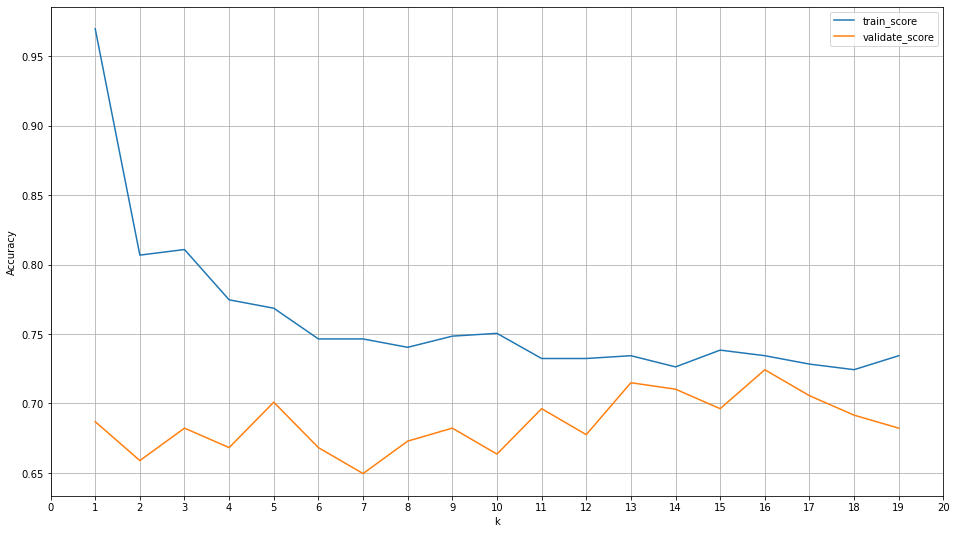

In [14]:
def eval_knn_model(k):
    '''
    For a given k, fits a k-neighbors classifier with the given k value and
    returns metrics about the model's performance.
    
    Returns a dictionary of k, training accuracy, and validate accuracy.
    
    Relies on X_train, y_train, X_validate, and y_validate being globally defined.
    '''
    knn = KNeighborsClassifier(k).fit(X_train, y_train)
    return {
        'k': k,
        'train_score': knn.score(X_train, y_train),
        'validate_score': knn.score(X_validate, y_validate),
    }

results = pd.DataFrame([eval_knn_model(k) for k in range(1, 20)])
results.set_index('k').plot(figsize=(16, 9))
plt.ylabel('Accuracy')
plt.xticks(range(21))
plt.grid()

# Logistic Regression Exercises
- https://ds.codeup.com/classification/logistic-regression/

In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

from acquire_cu import get_titanic_data
from prepare_cu import titanic_split

In [17]:
# Acquire Stage
df = get_titanic_data()


In [18]:
# Handle missing ages
avg_age = df.age.mean()
df.age = df.age.fillna(avg_age)

# Encode the gender column
df["is_female"] = (df.sex == "female")

# Encode the embarked_town
# Embark_Town values are Southampton, Cherbourg, and Queenstown
dummy_df = pd.get_dummies(df[['embark_town']], dummy_na=False, drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

# Drop unnecessary columns
df = df.drop(columns=["passenger_id", "deck", "class", "embarked", "sex", "embark_town"])

df.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,False,0,1
1,1,1,38.0,1,0,71.2833,0,True,0,0
2,1,3,26.0,0,0,7.9250,1,True,0,1


In [19]:
# double check to make sure we don't have any nulls
df.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
is_female                  0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [21]:
# Split the datasets
train, validate, test = titanic_split(df)

In [22]:
# Separate out our X and y values
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [23]:
#baseline setup
#most frequently observed outcome will beour baseline, which is 0, not surived at 307
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [24]:
baseline_accuracy = (train.survived == 0).mean()
round(baseline_accuracy, 3)

0.616

# 1.
- Create a model that includes age in addition to fare and pclass.
- Does this model perform better than your baseline?

In [27]:
#create the logistic regression
logit = LogisticRegression(random_state=123)

#specify the features we are using
features = ['age', 'pclass', 'fare']

#fit a model usuing only these specified features: 
#could also use: 
#logit.fit(X_train[['age', 'pclass', 'fare']])
logit.fit(X_train[features], y_train)

#since we .fit on a subset, we will also predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.70


# 2. 
- Include sex in your model as well.
    - Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [28]:
#create the logistic regression
logit1 = LogisticRegression(random_state=123)

#specifiy the features were are using
features = ['age', 'pclass', 'fare', 'is_female']

#fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using age, pclass, fare, and gender features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using age, pclass, fare, and gender features
Accuracy of Logistic Regression classifier on training set: 0.81


# 3. 
- Try out other combinations of features and models.
 
 - Models Created:
    - logit2, all Features, 0.82 accuracy
    - logit3, all features with class_weight="balanced", .80 accuracy
    - logit4, only age, .62 accuracy
    - logit5, only pclass, .67 accuracy
    - logit6, C hyperparameter close to zero, .62 accuracy

In [29]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.82


In [30]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.8


In [31]:
# Only Age 
features = ["age"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.62


In [32]:
# Only pclass
features = ["pclass"]

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression(random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')


All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.67


In [33]:
# All Features, C=0
# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression(random_state=123, C=0.00000000000000000001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is 0.62
Accuracy of this Logistic Regression on training set: 0.62


# 4. 
- Use you best 3 models to predict and evaluate on your validate sample.
    - logit1 trained with features = ["age", "pclass", "fare", "is_female"] has .81 accuracy
    - logit2 trained on all features, with all other hyperparameters defaulted, has .82 accuracy
    - logit3 trained on all features with class_weight='balanced' has accuracy of .80


In [34]:
# Let's determine logit1's metrics on validate
features = ["age", "pclass", "fare", "is_female"]

y_pred = logit1.predict(X_validate[features])

print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

Logit1 model using age, pclass, fare, and is_female as the features
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.72      0.67      0.70        82

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214



In [35]:
# Logit2 uses all features
y_pred = logit2.predict(X_validate)

print("Logit2 model using all features and all model defaults")
print(classification_report(y_validate, y_pred))

Logit2 model using all features and all model defaults
              precision    recall  f1-score   support

           0       0.80      0.86      0.82       132
           1       0.74      0.65      0.69        82

    accuracy                           0.78       214
   macro avg       0.77      0.75      0.76       214
weighted avg       0.77      0.78      0.77       214



In [36]:
# Logit3 uses all features and class_weight='balanced'
y_pred = logit3.predict(X_validate)

print("Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default")
print(classification_report(y_validate, y_pred))

Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       132
           1       0.70      0.72      0.71        82

    accuracy                           0.78       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.78      0.78      0.78       214

